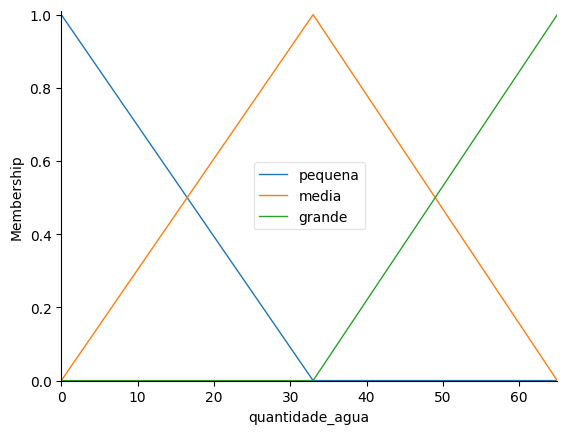

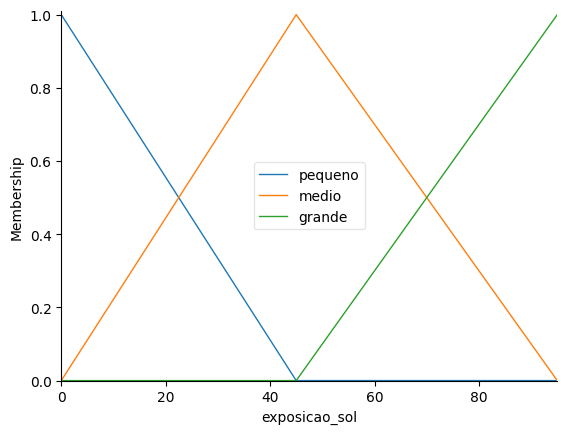

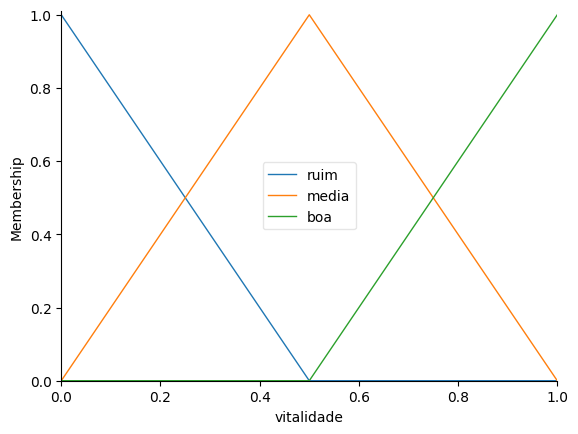

Vitalidade para 45 ml e 50 minutos: 0.497


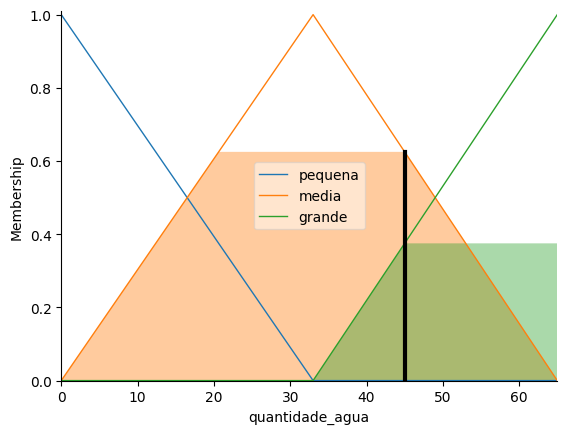

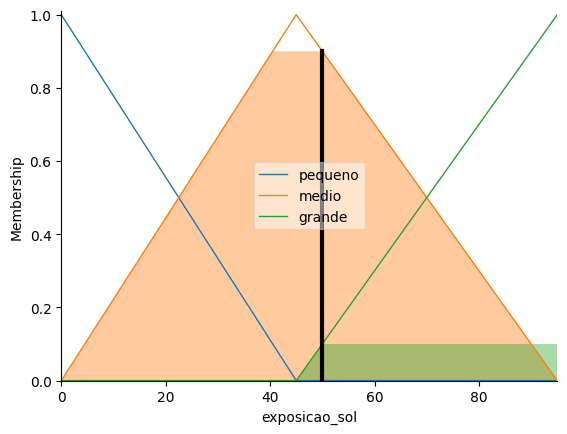

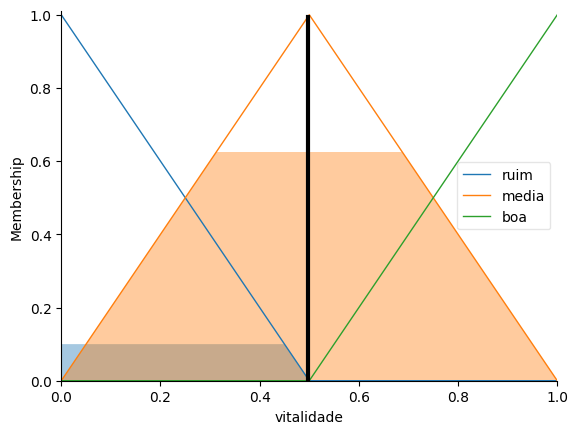

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definição dos universos de discurso
agua = ctrl.Antecedent(np.arange(0, 66, 1), 'quantidade_agua')  # 0 a 65 ml
sol = ctrl.Antecedent(np.arange(0, 96, 1), 'exposicao_sol')     # 0 a 95 minutos
vitalidade = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'vitalidade')  # 0 a 1

# Definição das funções de pertinência para a água
agua['pequena'] = fuzz.trimf(agua.universe, [0, 0, 33])
agua['media'] = fuzz.trimf(agua.universe, [0, 33, 65])
agua['grande'] = fuzz.trimf(agua.universe, [33, 65, 65])

# Definição das funções de pertinência para o sol
sol['pequeno'] = fuzz.trimf(sol.universe, [0, 0, 45])
sol['medio'] = fuzz.trimf(sol.universe, [0, 45, 95])
sol['grande'] = fuzz.trimf(sol.universe, [45, 95, 95])

# Definição das funções de pertinência para a vitalidade
vitalidade['ruim'] = fuzz.trimf(vitalidade.universe, [0, 0, 0.5])
vitalidade['media'] = fuzz.trimf(vitalidade.universe, [0, 0.5, 1])
vitalidade['boa'] = fuzz.trimf(vitalidade.universe, [0.5, 1, 1])

# Visualização das funções de pertinência
agua.view()
sol.view()
vitalidade.view()
plt.show()

# Base de regras conforme a tabela fornecida
regra1 = ctrl.Rule(agua['pequena'] & sol['pequeno'], vitalidade['boa'])
regra2 = ctrl.Rule(agua['pequena'] & sol['medio'], vitalidade['boa'])
regra3 = ctrl.Rule(agua['pequena'] & sol['grande'], vitalidade['ruim'])
regra4 = ctrl.Rule(agua['media'] & sol['pequeno'], vitalidade['boa'])
regra5 = ctrl.Rule(agua['media'] & sol['medio'], vitalidade['media'])
regra6 = ctrl.Rule(agua['media'] & sol['grande'], vitalidade['ruim'])
regra7 = ctrl.Rule(agua['grande'] & sol['pequeno'], vitalidade['ruim'])
regra8 = ctrl.Rule(agua['grande'] & sol['medio'], vitalidade['media'])
regra9 = ctrl.Rule(agua['grande'] & sol['grande'], vitalidade['ruim'])

# Sistema de controle
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

# Função para calcular a vitalidade
def calcular_vitalidade(qtde_agua, tempo_sol):
    sistema.input['quantidade_agua'] = qtde_agua
    sistema.input['exposicao_sol'] = tempo_sol
    sistema.compute()
    return sistema.output['vitalidade']

# Cálculo para os valores solicitados (45 ml e 50 minutos)
vitalidade_resultante = calcular_vitalidade(45, 50)
print(f"Vitalidade para 45 ml e 50 minutos: {vitalidade_resultante:.3f}")

# Visualização do resultado
agua.view(sim=sistema)
sol.view(sim=sistema)
vitalidade.view(sim=sistema)
plt.show()